# Visualizing viruses

Visualize viruses by their different relationships based on dates, antigenicity, and phylogenetics.

In [34]:
from augur.titer_model import TiterCollection
from augur.utils import json_to_tree
import json
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("ticks")
plt.style.use("huddlej")

First, download a recent 2y H3 tree.

In [3]:
!curl http://data.nextstrain.org/flu_seasonal_h3n2_ha_2y_tree.json | gzip -d -c > flu_seasonal_h3n2_ha_2y_tree.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  831k  100  831k    0     0  1231k      0 --:--:-- --:--:-- --:--:-- 1232k


In [4]:
with open("flu_seasonal_h3n2_ha_2y_tree.json", "r") as fh:
    json_tree = json.load(fh)

In [5]:
tree = json_to_tree(json_tree)

In [6]:
tree

Clade(branch_length=0, clade=3950, name='NODE_0002169', numdate=2011.966681659888, strain='NODE_0002169', yvalue=2065.6384680217548)

Plot viruses by random values on the x and y axis.

In [23]:
random_x_positions = 2012.0 + np.random.random(size=tree.count_terminals()) * 7

In [24]:
random_x_positions.shape

(2167,)

In [15]:
y_values = [k.yvalue for k in tree.find_clades()]

In [16]:
min(y_values)

1

In [17]:
max(y_values)

2167

In [19]:
tree.count_terminals()

2167

In [20]:
random_y_positions = np.random.randint(1, 2167, size=tree.count_terminals())

In [21]:
random_y_positions.shape

(2167,)

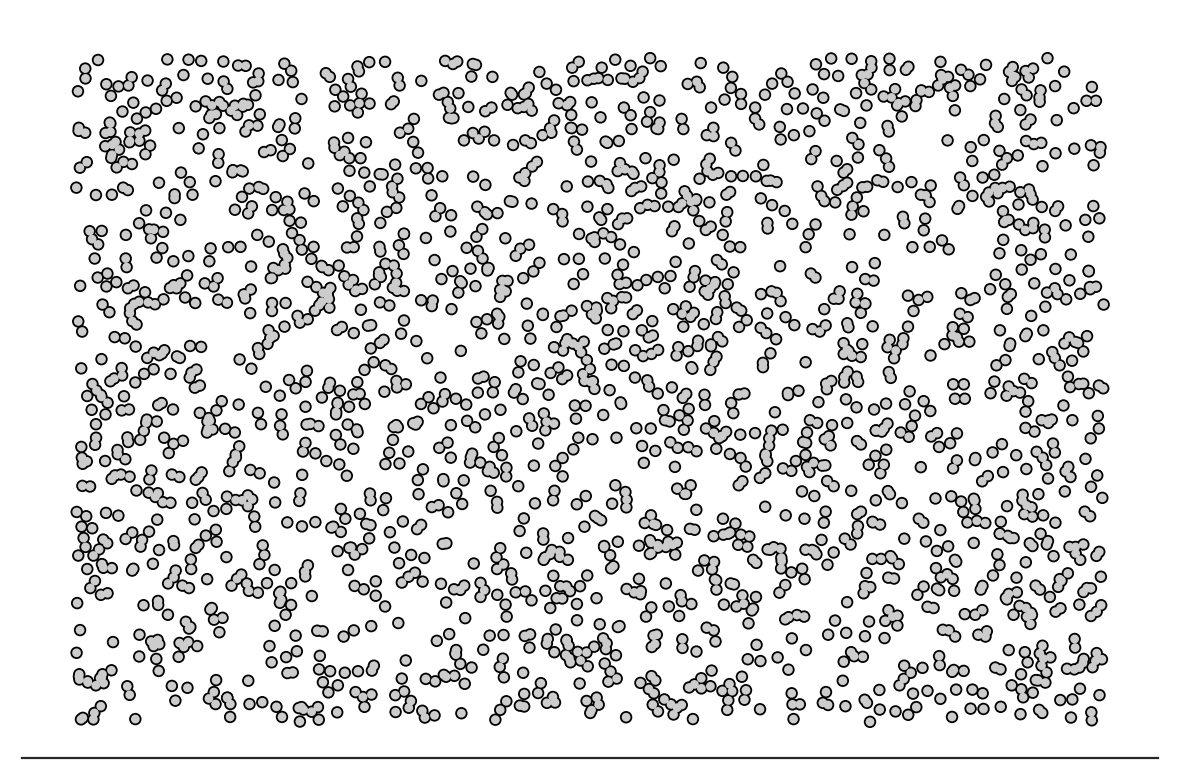

In [64]:
initial_branch_width=10
tip_size=10
default_color = "#cccccc"
color_by_trait = None

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    trait_name = color_by_trait
    traits = [k.attr[trait_name] for k in tree.find_clades()]
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(6, 4), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(terminal=True): ## iterate over objects in tree
    x = random_x_positions[i]
    y = random_y_positions[i]
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(c)

        ax.plot([x,x],[k.clades[-1].yvalue, k.clades[0].yvalue], lw=branchWidth, color=c, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(c)


# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='x',size=0)
ax.set_xticklabels([])
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

gs.tight_layout(fig)
plt.savefig("viruses_random_x_random_y.png")

Plot viruses by date on the x axis and by random values on the y axis.

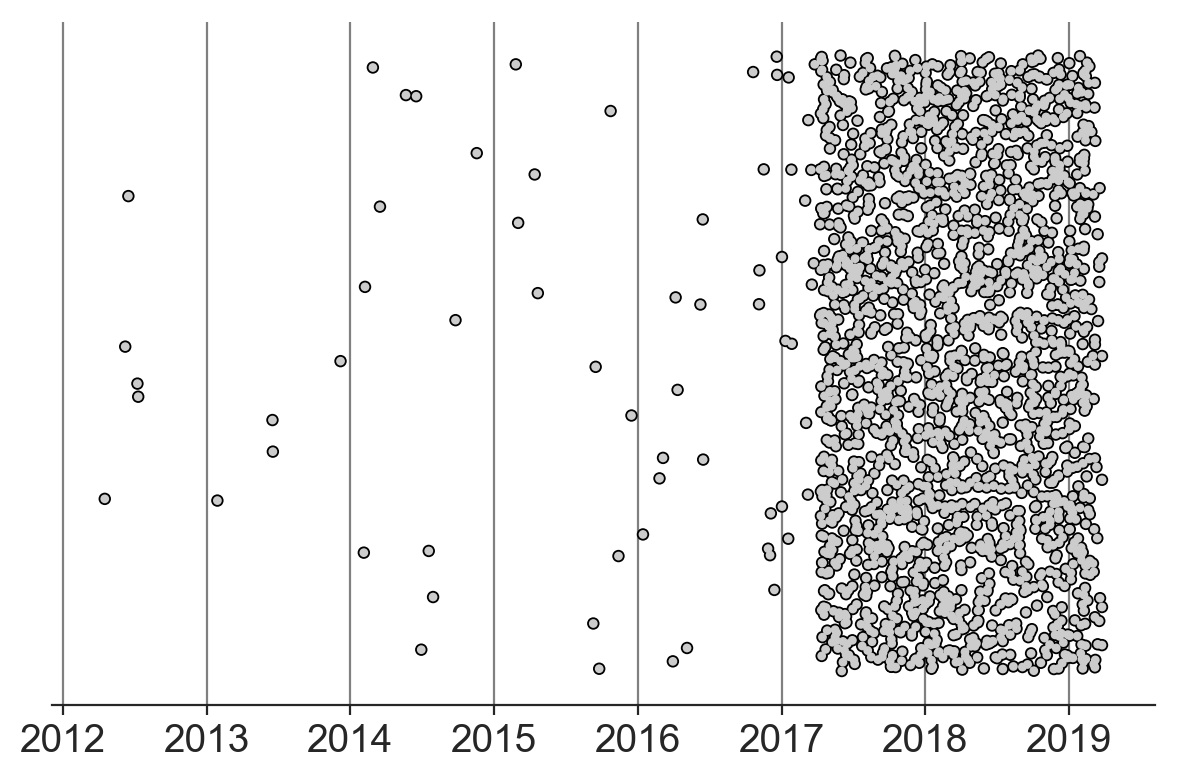

In [65]:
initial_branch_width=10
tip_size=10
default_color = "#cccccc"
color_by_trait = None

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    trait_name = color_by_trait
    traits = [k.attr[trait_name] for k in tree.find_clades()]
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(6, 4), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(terminal=True): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = random_y_positions[i]
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(c)

        ax.plot([x,x],[k.clades[-1].yvalue, k.clades[0].yvalue], lw=branchWidth, color=c, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(c)


# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

gs.tight_layout(fig)
plt.savefig("viruses_date_x_random_y.png")

Plot viruses by date on the x axis, random values on the y axis, and colored by antigenic distance from last vaccine strain.

In [35]:
# Load raw titer measurements.
measurements, strains, sources = TiterCollection.load_from_file("../data/h3n2_cell_hi_titers.tsv")

Read titers from ../data/h3n2_cell_hi_titers.tsv, found:
 --- 10352 strains
 --- 57503 data sources
 --- 79946 total measurements


In [41]:
titers = TiterCollection(measurements)

In [36]:
type(measurements)

dict

In [38]:
len(measurements.keys())

60923

In [42]:
titers.normalize_titers()

('A/HongKong/34/1990', 'HK/34/90') : using 90% percentile instead of autologous, 640.0
('A/Netherlands/172/1996', 'NL/172/96') : using 90% percentile instead of autologous, 728.0
('A/Panama/7149/2010', 'PN/7149') : using 90% percentile instead of autologous, 640.0
('A/HongKong/2831/2005', 'HONG-KONG/2831-LOT-2005-087/2005-CDC') : using 90% percentile instead of autologous, 640.0
('A/Scotland/840/1974', 'SL/840/74') : using 90% percentile instead of autologous, 640.0
('A/Honduras/93/2005', 'HONDURAS/93-LOT-2007-006-NEW/2005-CDC') : using 90% percentile instead of autologous, 1280.0
('A/HongKong/2831/2005', 'HONG-KONG/2831-LOT-2006-122/2005-CDC') : using 90% percentile instead of autologous, 608.0
('A/Victoria/3/1975', 'VI/3A/75') : using 90% percentile instead of autologous, 949.3999999999999
('A/England/496/1980', 'EN/496/80') : using 90% percentile instead of autologous, 4669.999999999999
('A/Victoria/512/2005', 'VICTORIA/512-LOT-2006-085/2005-CDC') : using 90% percentile instead of a

In [43]:
type(titers.titers_normalized)

dict

In [44]:
len(titers.titers_normalized.keys())

60269

In [45]:
list(titers.titers_normalized.items())[:5]

[(('A/Akita/4/1993', ('A/Shandong/9/1993', 'SD/9/93')), 0.394019718009762),
 (('A/Alabama/5/2010', ('A/Alaska/5/2010', 'A/Ala/5/10_F27/10')),
  0.5555555555555545),
 (('A/Akita/4/1993', ('A/Finland/338/1995', 'FI/338/95')), 0.2940080094299269),
 (('A/Akita/4/1993', ('A/Nanchang/933/1995', 'NA/933/95')), 5.674780762969625),
 (('A/Akita/4/1993', ('A/Beijing/32/1992', 'BE/32A/92')), 0.7970865866037773)]

In [52]:
vaccine_strain = "A/Singapore/Infimh-16-0019/2016"

In [46]:
distance_from_reference = {}
for (test_virus, (reference_virus, serum)), titer in titers.titers_normalized.items():
    if reference_virus == vaccine_strain:
        distance_from_reference[test_virus] = titer

In [48]:
len(distance_from_reference)

1274

In [50]:
tree.count_terminals()

2167

In [51]:
1274 / 2167.0

0.5879095523765574

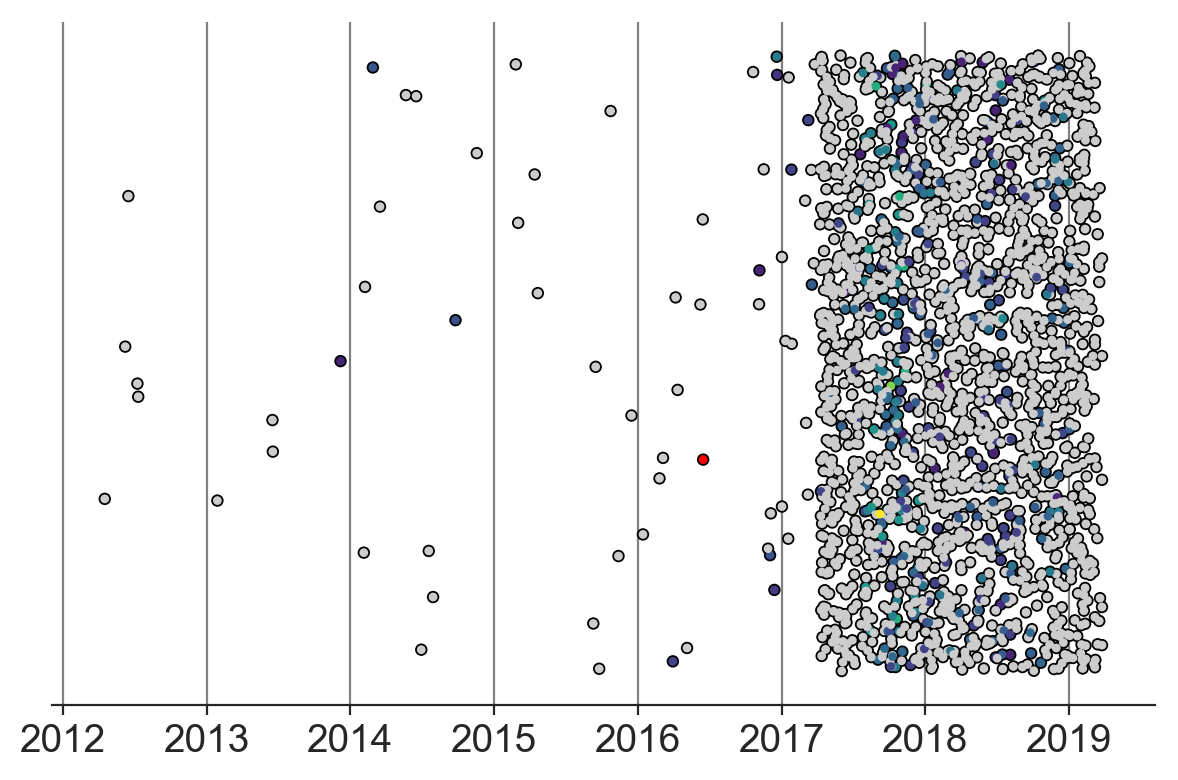

In [66]:
initial_branch_width=10
tip_size=10
default_color = "#cccccc"
color_by_trait = "cTiterSub"

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    traits = list(distance_from_reference.values())
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(6, 4), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(terminal=True): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = random_y_positions[i]
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color
    if k.name == vaccine_strain:
        c = "#ff0000"
    elif k.name in distance_from_reference:
        c = cmap(norm(distance_from_reference[k.name]))

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(c)

        ax.plot([x,x],[k.clades[-1].yvalue, k.clades[0].yvalue], lw=branchWidth, color=c, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(c)


# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

gs.tight_layout(fig)
plt.savefig("viruses_date_x_random_y_titers_to_vaccine_strain.png")

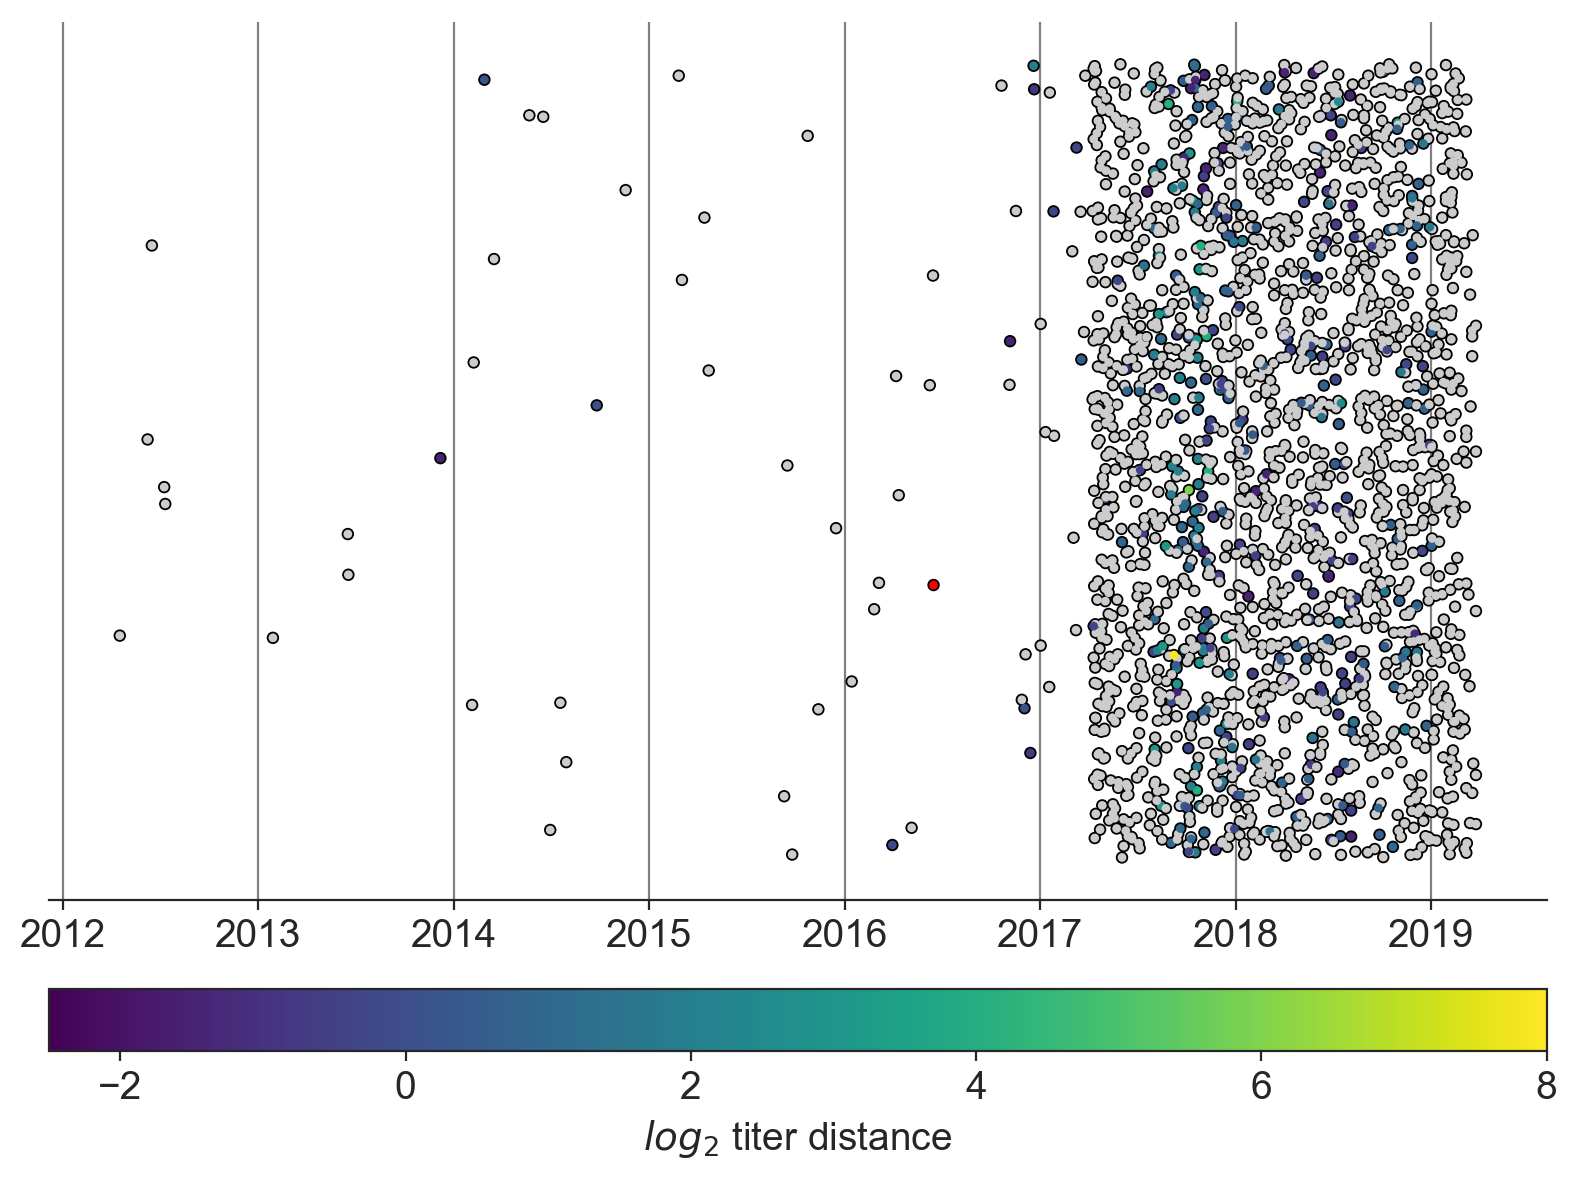

In [73]:
initial_branch_width=10
tip_size=10
default_color = "#cccccc"
color_by_trait = "cTiterSub"

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    traits = list(distance_from_reference.values())
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(8, 6), facecolor='w')
gs = gridspec.GridSpec(2, 1, height_ratios=[14, 1], width_ratios=[1], hspace=0.1, wspace=0.1)
ax = fig.add_subplot(gs[0])
colorbar_ax = fig.add_subplot(gs[1])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(terminal=True): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = random_y_positions[i]
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color
    if k.name == vaccine_strain:
        c = "#ff0000"
    elif k.name in distance_from_reference:
        c = cmap(norm(distance_from_reference[k.name]))

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(c)

        ax.plot([x,x],[k.clades[-1].yvalue, k.clades[0].yvalue], lw=branchWidth, color=c, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(c)


# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

cb1 = mpl.colorbar.ColorbarBase(
            colorbar_ax,
            cmap=cmap,
            norm=norm,
            orientation='horizontal'
)
cb1.set_label("$log_{2}$ titer distance")

gs.tight_layout(fig)
plt.savefig("viruses_date_x_random_y_titers_to_vaccine_strain_with_color_bar.png")

Plot viruses by date on the x axis and by phylogenetic group on the y axis. Color viruses by the same titer distance shown above.

Plot viruses by phylogeny colored by titer substition model interpolation.

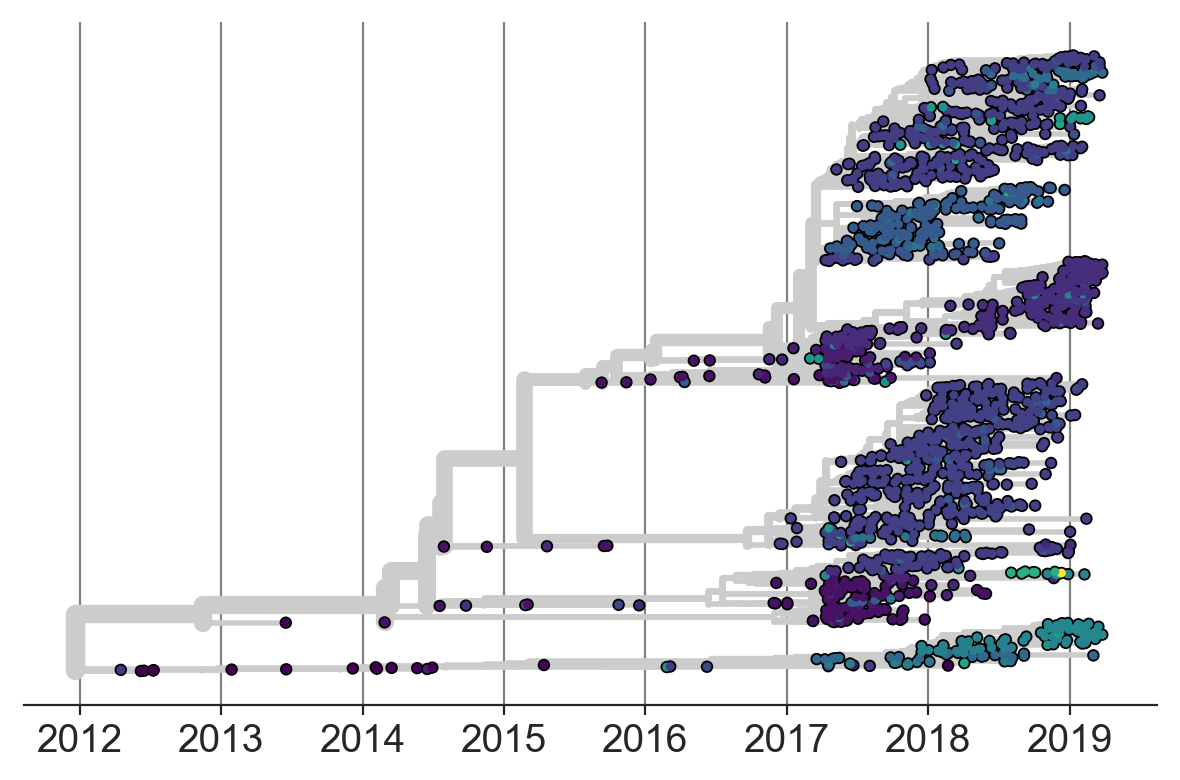

In [80]:
initial_branch_width=5
tip_size=10
default_color = "#cccccc"
color_by_trait = "cTiterSub"

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    trait_name = color_by_trait
    traits = [k.attr[trait_name] for k in tree.find_clades()]
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(6, 4), facecolor='w')
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = y_span - k.yvalue
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color
    if trait_name in k.attr:
        c = cmap(norm(k.attr[trait_name]))

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(default_color)

        ax.plot([x,x],[y_span - k.clades[-1].yvalue, y_span - k.clades[0].yvalue], lw=branchWidth, color=default_color, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(default_color)

branch_lc = LineCollection(branch_line_segments, zorder=9)
branch_lc.set_color(branch_line_colors)
branch_lc.set_linewidth(branch_line_widths)
branch_lc.set_label(branch_line_labels)
branch_lc.set_linestyle("-")
ax.add_collection(branch_lc)

# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

gs.tight_layout(fig)
plt.savefig("viruses_date_x_phylogeny_y_interpolated_titers.png")

In [69]:
max(traits)

4.115724857603282

In [70]:
min(traits)

0

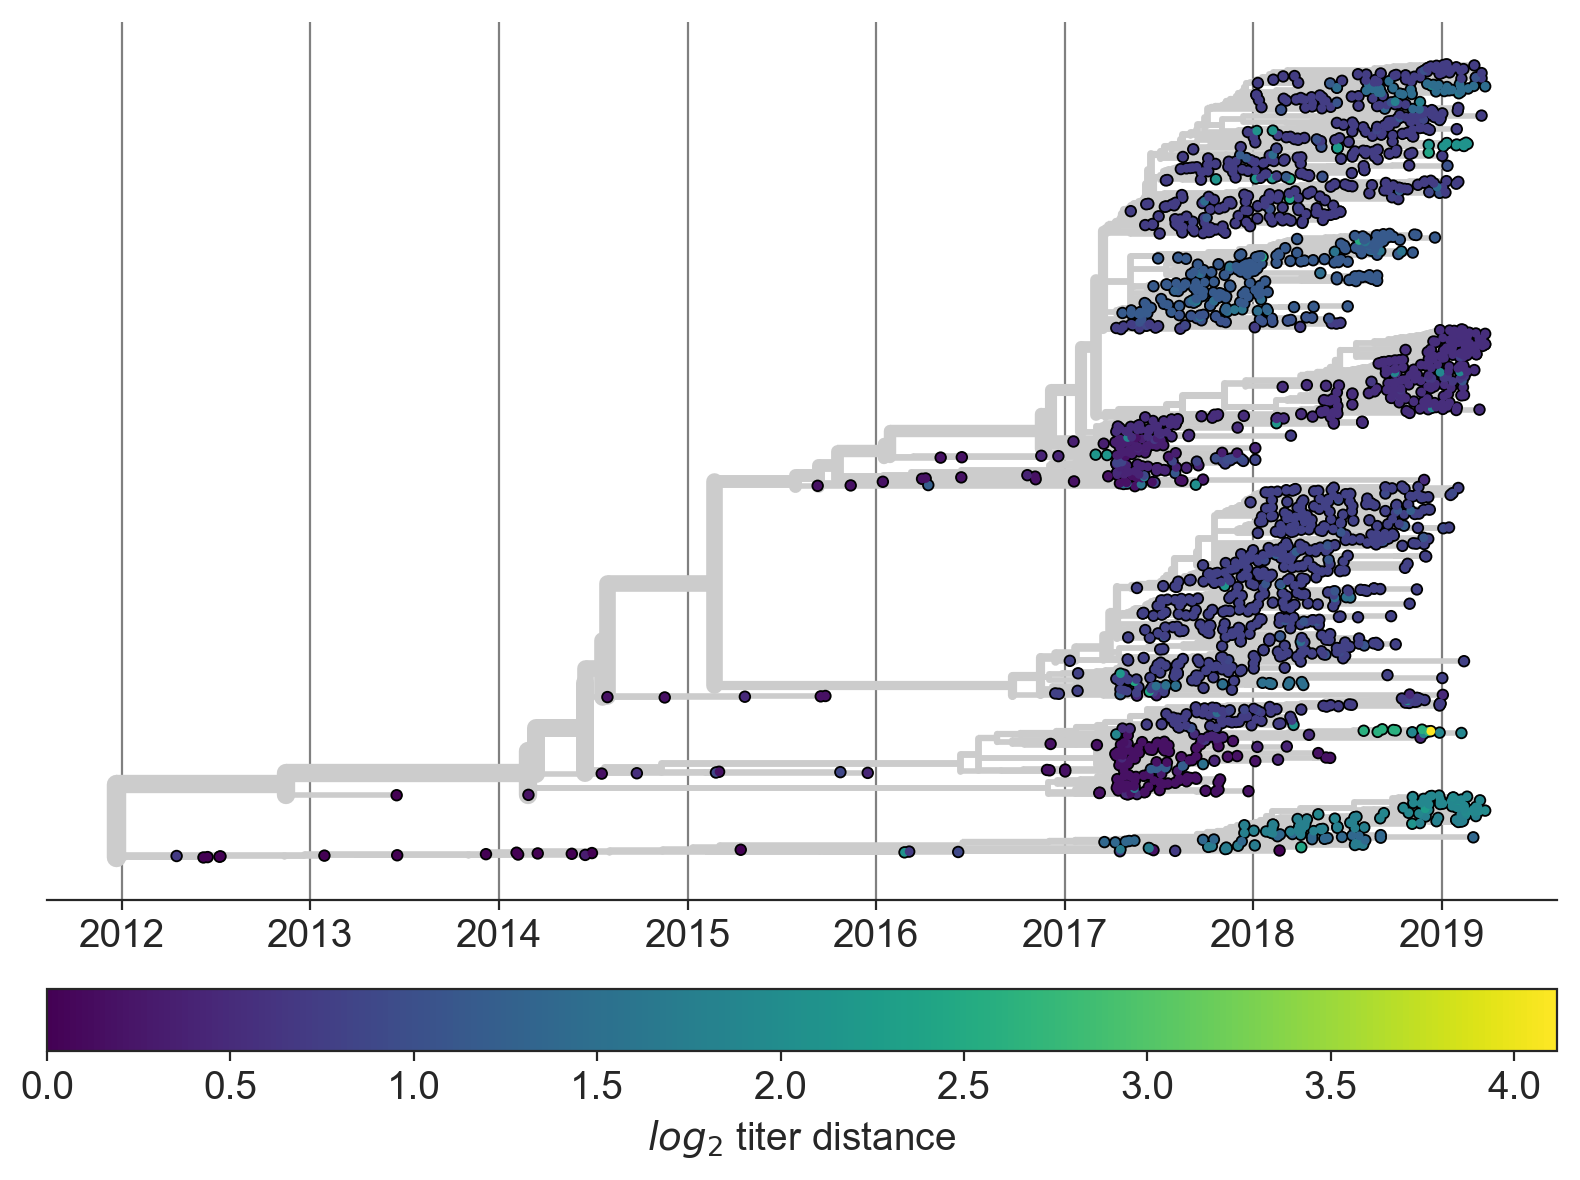

In [79]:
initial_branch_width=5
tip_size=10
default_color = "#cccccc"
color_by_trait = "cTiterSub"

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    trait_name = color_by_trait
    traits = [k.attr[trait_name] for k in tree.find_clades()]
    norm = mpl.colors.Normalize(min(traits), max(traits))
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(8, 6), facecolor='w')
gs = gridspec.GridSpec(2, 1, height_ratios=[14, 1], width_ratios=[1], hspace=0.1, wspace=0.1)
ax = fig.add_subplot(gs[0])
colorbar_ax = fig.add_subplot(gs[1])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = y_span - k.yvalue
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color
    if trait_name in k.attr:
        c = cmap(norm(k.attr[trait_name]))

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(default_color)

        ax.plot([x,x],[y_span - k.clades[-1].yvalue, y_span - k.clades[0].yvalue], lw=branchWidth, color=default_color, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(default_color)

branch_lc = LineCollection(branch_line_segments, zorder=9)
branch_lc.set_color(branch_line_colors)
branch_lc.set_linewidth(branch_line_widths)
branch_lc.set_label(branch_line_labels)
branch_lc.set_linestyle("-")
ax.add_collection(branch_lc)

# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

cb1 = mpl.colorbar.ColorbarBase(
            colorbar_ax,
            cmap=cmap,
            norm=norm,
            orientation='horizontal'
)
cb1.set_label("$log_{2}$ titer distance")

gs.tight_layout(fig)
plt.savefig("viruses_date_x_phylogeny_y_interpolated_titers_with_color_bar.png")

Visualize viruses with LBI annotations.

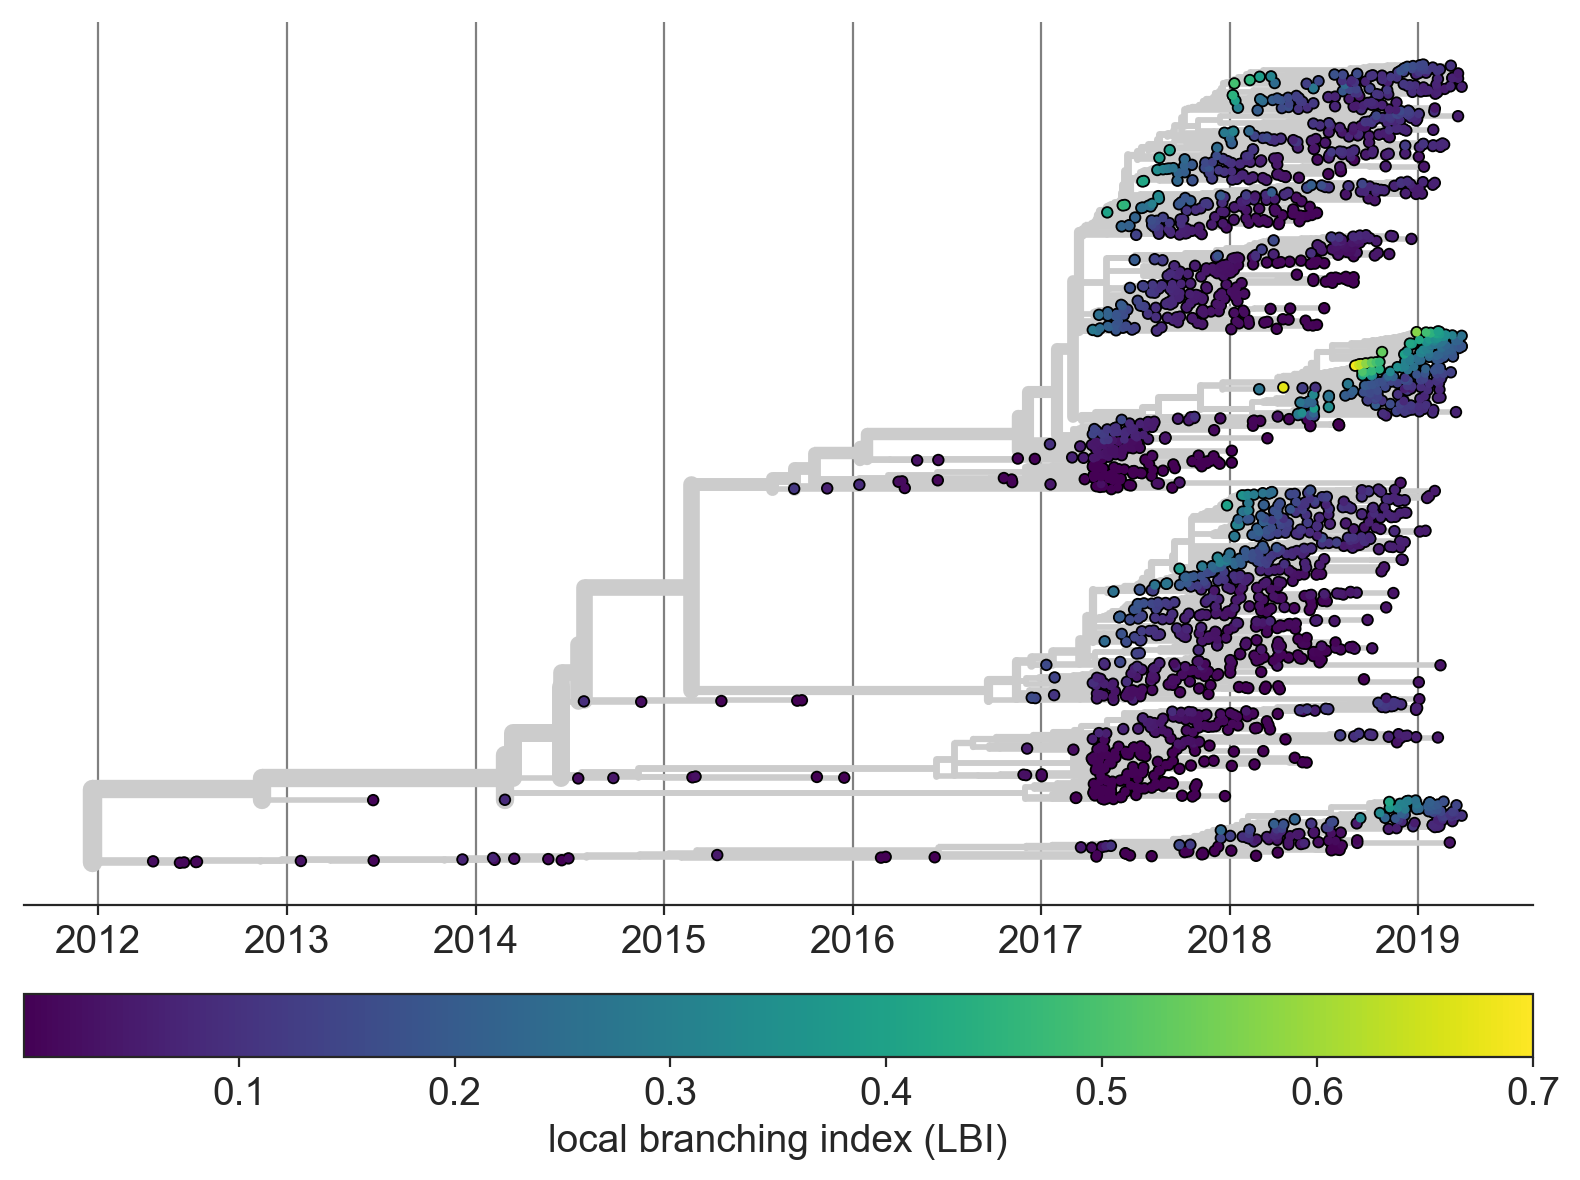

In [78]:
initial_branch_width=5
tip_size=10
default_color = "#cccccc"
color_by_trait = "lbi"

# Plot H3N2 tree in BALTIC style from Bio.Phylo tree.
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200

#mpl.rcParams['font.weight']=300
#mpl.rcParams['axes.labelweight']=300
#mpl.rcParams['font.size']=14

yvalues = [node.yvalue for node in tree.find_clades()]
y_span = max(yvalues)
y_unit = y_span / float(len(yvalues))

# Setup colors.
if color_by_trait:
    trait_name = color_by_trait
    traits = [k.attr[trait_name] for k in tree.find_clades()]
    norm = mpl.colors.Normalize(min(traits), 0.7)
    cmap = mpl.cm.viridis

#
# Setup the figure grid.
#

fig = plt.figure(figsize=(8, 6), facecolor='w')
gs = gridspec.GridSpec(2, 1, height_ratios=[14, 1], width_ratios=[1], hspace=0.1, wspace=0.1)
ax = fig.add_subplot(gs[0])
colorbar_ax = fig.add_subplot(gs[1])

L=len([k for k in tree.find_clades() if k.is_terminal()])

# Setup arrays for tip and internal node coordinates.
tip_circles_x = []
tip_circles_y = []
tip_circles_color = []
tip_circle_sizes = []
node_circles_x = []
node_circles_y = []
node_circles_color = []
node_line_widths = []
node_line_segments = []
node_line_colors = []
branch_line_segments = []
branch_line_widths = []
branch_line_colors = []
branch_line_labels = []

i = 0
for k in tree.find_clades(): ## iterate over objects in tree
    x = k.attr["num_date"]
    y = y_span - k.yvalue
    i += 1

    if k.parent is None:
        xp = None
    else:
        xp=k.parent.attr["num_date"] ## get x position of current object's parent

    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp=x

    c = default_color
    if trait_name in k.attr:
        c = cmap(norm(k.attr[trait_name]))

    branchWidth=2
    if k.is_terminal(): ## if leaf...
        s = tip_size ## tip size can be fixed

        tip_circle_sizes.append(s)
        tip_circles_x.append(x)
        tip_circles_y.append(y)
        tip_circles_color.append(c)
    else: ## if node...
        k_leaves = [child
                    for child in k.find_clades()
                    if child.is_terminal()]

        # Scale branch widths by the number of tips.
        branchWidth += initial_branch_width * len(k_leaves) / float(L)

        if len(k.clades)==1:
            node_circles_x.append(x)
            node_circles_y.append(y)
            node_circles_color.append(default_color)

        ax.plot([x,x],[y_span - k.clades[-1].yvalue, y_span - k.clades[0].yvalue], lw=branchWidth, color=default_color, ls='-', zorder=9, solid_capstyle='round')

    branch_line_segments.append([(xp, y), (x, y)])
    branch_line_widths.append(branchWidth)
    branch_line_colors.append(default_color)

branch_lc = LineCollection(branch_line_segments, zorder=9)
branch_lc.set_color(branch_line_colors)
branch_lc.set_linewidth(branch_line_widths)
branch_lc.set_label(branch_line_labels)
branch_lc.set_linestyle("-")
ax.add_collection(branch_lc)

# Add circles for tips and internal nodes.
tip_circle_sizes = np.array(tip_circle_sizes)
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes, facecolor=tip_circles_color, edgecolor='none',zorder=11) ## plot circle for every tip
ax.scatter(tip_circles_x, tip_circles_y, s=tip_circle_sizes*2, facecolor='k', edgecolor='none', zorder=10) ## plot black circle underneath
ax.scatter(node_circles_x, node_circles_y, facecolor=node_circles_color, s=50, edgecolor='none', zorder=10, lw=2, marker='|') ## mark every node in the tree to highlight that it's a multitype tree

#ax.set_ylim(-10, y_span - 300)

ax.spines['top'].set_visible(False) ## no axes
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='x',ls='-',color='grey')
ax.tick_params(axis='y',size=0)
ax.set_yticklabels([])

cb1 = mpl.colorbar.ColorbarBase(
            colorbar_ax,
            cmap=cmap,
            norm=norm,
            orientation='horizontal'
)
cb1.set_label("local branching index (LBI)")

gs.tight_layout(fig)
plt.savefig("viruses_date_x_phylogeny_y_lbi_with_color_bar.png")